ReadME: 
        1. Keep all the files in one folder, i.e.,Analytic_codingtest's_Solution, t.json.gz and y.json.gz
        2. Run all Scripts once (Cell:Run All)
        3. Few descriptions and questions are written in Markdowns and headings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Reading both files and cleaning the columns which are required for now.

In [2]:
td = pd.read_json('t.json.gz', orient='records', lines=True)
td['available_price'].fillna(td['available_price'].mean(),inplace=True)
td['mrp'].fillna(td['mrp'].mean(),inplace=True)
td.describe()
td.head()

,available_price,category,crawl_date,http_status,mrp,pack_size,subcategory,title,urlh
0,5.99,Household,20180727,200,0.0,30 ct,Trash Bags & Liners,Seventh Generation 13 Gallon Extra Strong Flap...,1ef0f41ebcee030a35440405f2f8b0165c719c89
1,5.49,Household,20180727,200,0.0,25 ct,Trash Bags & Liners,BioBag Food Scrap Bags Small 3 Gallon - 25 CT ...,c566570abdbe95b5e6a78eb8b3b2424108bf36a2
2,5.69,Household,20180727,200,0.0,30.0 ct,Trash Bags & Liners,If You Care Certified Compostable Food Waste B...,3b22b28b351dec75664b17fcf586023ddc21704c
3,5.99,Household,20180727,200,0.0,12 ct,Trash Bags & Liners,BioBag Food Scrap Bags Tall Kitchen 13 Gallon ...,7ff787f49e137237054f95e7cb5b0f8611e7f6fb
4,5.99,Household,20180727,200,0.0,20 ct,Trash Bags & Liners,Seventh Generation 13 Gal with Drawstring Clos...,a7ad16e71257855c033aad46eb5082a2153b97c6


In [3]:
yd = pd.read_json('y.json.gz', orient='records', lines=True)
yd['available_price'].fillna(yd['available_price'].mean(),inplace=True)
yd['mrp'].fillna(yd['mrp'].mean(),inplace=True)
yd.describe()

,available_price,crawl_date,http_status,mrp
count,141699.000000,141699.0,141699.000000,141699.000000
mean,8.305921,20180726.0,200.012011,0.615633
std,12.210145,0.0,1.618499,3.096523
min,0.000000,20180726.0,200.000000,0.000000
25%,3.390000,20180726.0,200.000000,0.000000
50%,5.290000,20180726.0,200.000000,0.000000
75%,9.190000,20180726.0,200.000000,0.000000
max,799.990000,20180726.0,502.000000,99.990000


# 1. No of URLH which are overlapping.

In [4]:
td['is_urlh_duplicate']=td.duplicated('urlh')
x= td['is_urlh_duplicate'].sum()
print("Number of overlapping URLH's from today's data are "+str(x))

Number of overlapping URLH's from today's data are 10802


In [5]:
yd['is_urlh_duplicate']=yd.duplicated('urlh')
x=yd['is_urlh_duplicate'].sum()
#yd['urlh']
print("Number of overlapping URLH's from yesterday's data are "+str(x))

Number of overlapping URLH's from yesterday's data are 10781


In [6]:
#td_org = td.loc[td['is_urlh_duplicate']==False]
#yd_org = yd.loc[yd['is_urlh_duplicate']==False]
td_clean=td[td['is_urlh_duplicate']==False]
yd_clean=yd[yd['is_urlh_duplicate']==False]
clean_urlh = pd.concat([td_clean['urlh'],yd_clean['urlh']],axis=1,keys = ['td','yd'])
overlap_urlh = clean_urlh[clean_urlh.td == clean_urlh.yd]
print("Number of overlapping URLH's from yesterday to today are "+str(overlap_urlh.td.count()))

Number of overlapping URLH's from yesterday to today are 306


# 2. For all the URLH which are overlapping, calculate the price difference (w.r.t available_price) if there is any between yesterday's and today's crawls.

In [7]:
price_difference = yd_clean['available_price'] - td_clean['available_price']
price_difference.dropna(axis=0,how='any',inplace=True)
print("The price difference between the URLH's which are overlapping between yesterday and today are:")
price_difference
#yd.dropna(axis=0,how='any',inplace=True)

The price difference between the URLH's which are overlapping between yesterday and today are:


0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24         0.00
25        -0.10
26         1.80
27         0.00
28         0.00
29        -2.00
          ...  
141660   -21.80
141661    -4.50
141663    -9.50
141665     4.70
141666   -13.12
141667     6.72
141670     7.50
141672     8.00
141673    -5.00
141674    -1.50
141676     9.00
141678     1.70
141679    -6.00
141680    14.10
141681     5.90
141682     6.80
141683    -3.30
141684    -5.00
141685    -5.30
141686    -5.00
141687    -1.00
141688    -1.50
141689    -7.00
141690    -4.50
141691   -11.50
141692    23.00
141693    -5.80
141694     2.01
141695    -5.80
141696     1.20
Name: available_price, L

A scatter plot which shows the range of difference price.

Text(0,0.5,'Difference in prices')

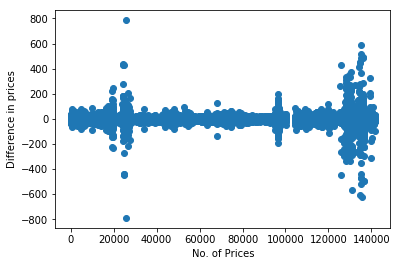

In [8]:
price = pd.DataFrame(price_difference)
price['index']=price.index
plt.scatter(price['index'],price['available_price'])
plt.xlabel("No. of Prices")
plt.ylabel("Difference in prices")

# 3. No of Unique categories in both files.
# 4. List of categories which is not overlapping.

In [9]:
td_unique_categories = td['category'].unique()
yd_unique_categories = yd['category'].unique()
today_unique_categories = pd.DataFrame(td_unique_categories)
yesterday_unique_categories = pd.DataFrame(yd_unique_categories)
today_unique_categories.rename(columns={0:'Today'},inplace=True)
yesterday_unique_categories.rename (columns={0:'Yesterday'},inplace=True)
print ("Number of Unique categories in today's file is "+str(today_unique_categories.count()[0]))
print ("Number of Unique categories in yesterdays's file is "+str(yesterday_unique_categories.count()[0]))
list_cat = pd.concat([today_unique_categories,yesterday_unique_categories],axis=1)
print ("List of Categories from both files which are not overlapping are in table below")
list_cat

Number of Unique categories in today's file is 50
Number of Unique categories in yesterdays's file is 50
List of Categories from both files which are not overlapping are in table below


,Today,Yesterday
0,Household,Household
1,Pets,Pets
2,Babies,Babies
3,Personal Care,Personal Care
4,Breakfast,Breakfast
5,International,International
6,Dry Goods & Pasta,Dry Goods & Pasta
7,Bulk,Bulk
8,Canned Goods,Canned Goods
9,Pantry,Pantry


# 5. Generate the stats with count for all taxonomies (taxonomy is concatenation of category and subcategory separated by " > ").

In [10]:
tt = pd.DataFrame (td['category'])
tt['subcategory']=td['subcategory']
taxo = tt.groupby('category')['subcategory'].value_counts()
cate = taxo.index.get_level_values(level=0)
subcate = taxo.index.get_level_values(level=1)
cnt = taxo.values
print ("The statistic with category, subcategory and their counts for today's file :\n\n")
for i in range (0,len(cnt)-1):
    print(cate[i],'>',subcate[i],':',cnt[i])
    i+=1

The statistic with category, subcategory and their counts for today's file :


Alcohol > Red Wines : 224
Alcohol > Beers & Coolers : 197
Alcohol > White Wines : 63
Alcohol > Specialty Wines & Champagnes : 45
Alcohol > Rosés : 26
Alcohol > Cocktail Mixes : 7
Alcohol > Spirits : 5
Ale Beer > IPA (India Pale Ale) : 389
Ale Beer > Belgian-Style Ale : 142
Ale Beer > Pale Ale : 115
Ale Beer > Wheat Ale : 101
Ale Beer > Stout : 85
Ale Beer > Amber/Red Ale : 63
Ale Beer > Blond Ale : 59
Ale Beer > Strong Ale & Barley Wine : 54
Ale Beer > Porter : 38
Ale Beer > Brown Ale : 24
Allergy & Cold Essentials > Allergy : 52
Allergy & Cold Essentials > Essentials : 34
Allergy & Cold Essentials > Pain & Fever : 31
Allergy & Cold Essentials > Cough & Cold Medicine : 30
American Whiskey > Whiskey : 226
American Whiskey > Other : 87
American Whiskey > Rye Whiskey : 76
American Whiskey > Tennessee Whiskey : 31
Babies > Baby Food & Formula : 1294
Babies > Diapers & Wipes : 543
Babies > Baby Bath & Body Care :

In [11]:
ty = pd.DataFrame (yd['category'])
ty['subcategory']=yd['subcategory']
taxoy = ty.groupby('category')['subcategory'].value_counts()
cat = taxoy.index.get_level_values(level=0)
subcat = taxoy.index.get_level_values(level=1)
cnt1 = taxoy.values
print ("The statistic with category, subcategory and their counts for Yesterday's file :\n\n")
for i in range (0,len(cnt1)-1):
    print(cat[i],'>',subcat[i],':',cnt1[i])
    i+=1

The statistic with category, subcategory and their counts for Yesterday's file :


Alcohol > Red Wines : 224
Alcohol > Beers & Coolers : 197
Alcohol > White Wines : 63
Alcohol > Specialty Wines & Champagnes : 45
Alcohol > Rosés : 26
Alcohol > Cocktail Mixes : 7
Alcohol > Spirits : 5
Ale Beer > IPA (India Pale Ale) : 383
Ale Beer > Belgian-Style Ale : 139
Ale Beer > Pale Ale : 107
Ale Beer > Wheat Ale : 97
Ale Beer > Stout : 84
Ale Beer > Amber/Red Ale : 57
Ale Beer > Blond Ale : 56
Ale Beer > Strong Ale & Barley Wine : 53
Ale Beer > Porter : 38
Ale Beer > Brown Ale : 24
Allergy & Cold Essentials > Allergy : 52
Allergy & Cold Essentials > Essentials : 31
Allergy & Cold Essentials > Pain & Fever : 28
Allergy & Cold Essentials > Cough & Cold Medicine : 27
American Whiskey > Whiskey : 226
American Whiskey > Other : 86
American Whiskey > Rye Whiskey : 75
American Whiskey > Tennessee Whiskey : 31
Babies > Baby Food & Formula : 1296
Babies > Diapers & Wipes : 538
Babies > Baby Bath & Body Car

# 6. Generate a new file where mrp is normalized. If there is a 0 or a non-float value or the key doesn't exist, make it "NA".

Normalization by formula: for yesterday's file

In [12]:
data=yd
data["mrp"]=((data["mrp"]-data["mrp"].min())/(data["mrp"].max()-data["mrp"].min()))
data.mrp
data["mrp"].replace(0,np.nan,inplace=True)
data.mrp

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7         0.089909
8         0.029903
9         0.052905
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
141669         NaN
141670         NaN
141671         NaN
141672         NaN
141673         NaN
141674         NaN
141675         NaN
141676         NaN
141677         NaN
141678         NaN
141679         NaN
141680         NaN
141681         NaN
141682         NaN
141683         NaN
141684         NaN
141685         NaN
141686         NaN
141687         NaN
141688         NaN
141689         NaN
141690      

Normalization using SKLEARN library: for both files

In [13]:
t = td[['mrp']].values.astype(float)
min_max_scaler = MinMaxScaler()
t_scaled = min_max_scaler.fit_transform(t)
t_mrp_normalized = pd.DataFrame(t_scaled)
t_mrp_normalized[0].replace((0,' '),np.nan,inplace=True)
print ("The normalized mrp values are: ")
t_mrp_normalized

The normalized mrp values are: 


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,0.089909
8,0.029903
9,0.052905


In [14]:
td_NEW = td
td_NEW['mrp'] = t_mrp_normalized[0]
print ("The new today's file with normalized MRP values: ")
td_NEW.head()

The new today's file with normalized MRP values: 


,available_price,category,crawl_date,http_status,mrp,pack_size,subcategory,title,urlh,is_urlh_duplicate
0,5.99,Household,20180727,200,NaN,30 ct,Trash Bags & Liners,Seventh Generation 13 Gallon Extra Strong Flap...,1ef0f41ebcee030a35440405f2f8b0165c719c89,False
1,5.49,Household,20180727,200,NaN,25 ct,Trash Bags & Liners,BioBag Food Scrap Bags Small 3 Gallon - 25 CT ...,c566570abdbe95b5e6a78eb8b3b2424108bf36a2,False
2,5.69,Household,20180727,200,NaN,30.0 ct,Trash Bags & Liners,If You Care Certified Compostable Food Waste B...,3b22b28b351dec75664b17fcf586023ddc21704c,False
3,5.99,Household,20180727,200,NaN,12 ct,Trash Bags & Liners,BioBag Food Scrap Bags Tall Kitchen 13 Gallon ...,7ff787f49e137237054f95e7cb5b0f8611e7f6fb,False
4,5.99,Household,20180727,200,NaN,20 ct,Trash Bags & Liners,Seventh Generation 13 Gal with Drawstring Clos...,a7ad16e71257855c033aad46eb5082a2153b97c6,False


In [15]:
y = yd[['mrp']].values.astype(float)
min_max_scaler = MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
y_mrp_normalized = pd.DataFrame(y_scaled)
y_mrp_normalized[0].replace((0,' '),np.nan,inplace=True)
print ("The normalized mrp values are: ")
y_mrp_normalized

The normalized mrp values are: 


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,0.085978
8,0.025713
9,0.048815


In [16]:
yd_NEW = yd
yd_NEW['mrp'] = y_mrp_normalized[0]
print ("The new yesterday's file with normalized MRP values: ")
yd_NEW.head()

The new yesterday's file with normalized MRP values: 


,available_price,category,crawl_date,http_status,mrp,pack_size,subcategory,title,urlh,is_urlh_duplicate
0,5.99,Household,20180726,200,NaN,30 ct,Trash Bags & Liners,Seventh Generation 13 Gallon Extra Strong Flap...,1ef0f41ebcee030a35440405f2f8b0165c719c89,False
1,5.49,Household,20180726,200,NaN,25 ct,Trash Bags & Liners,BioBag Food Scrap Bags Small 3 Gallon - 25 CT ...,c566570abdbe95b5e6a78eb8b3b2424108bf36a2,False
2,5.69,Household,20180726,200,NaN,30.0 ct,Trash Bags & Liners,If You Care Certified Compostable Food Waste B...,3b22b28b351dec75664b17fcf586023ddc21704c,False
3,5.99,Household,20180726,200,NaN,12 ct,Trash Bags & Liners,BioBag Food Scrap Bags Tall Kitchen 13 Gallon ...,7ff787f49e137237054f95e7cb5b0f8611e7f6fb,False
4,5.99,Household,20180726,200,NaN,20 ct,Trash Bags & Liners,Seventh Generation 13 Gal with Drawstring Clos...,a7ad16e71257855c033aad46eb5082a2153b97c6,False
